In [4]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from matplotlib import cm
import seaborn as sns

In [540]:
def poisson(x):
    return -(-x * x) * np.exp(-x)


poisson(1)

0.36787944117144233

In [541]:
def generate_data(x1, x2):
    return -(poisson(x1) + x2 ** (-3 / 2))


n = 15
m = 10
x1 = np.linspace(1, 5, n)
x2 = np.linspace(1, 8, m)

X1, X2 = np.meshgrid(x1, x2)

noise = np.random.randn(n)
y_real = generate_data(X1, X2)
y = generate_data(X1, X2) + noise * 3e-2

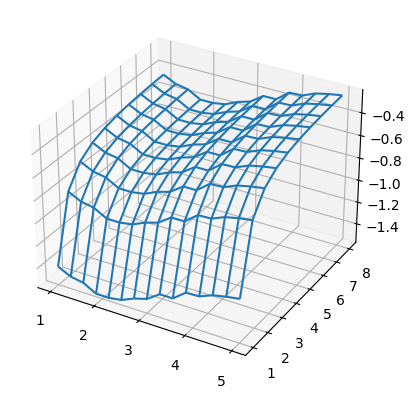

In [542]:
ax = plt.axes(projection='3d')

# ax.view_init(0, 90)
ax.plot_wireframe(X1, X2, y);

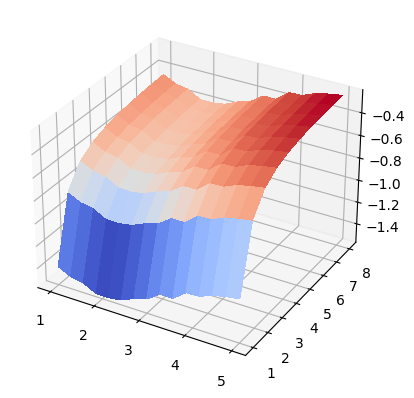

In [543]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, y, cmap=cm.coolwarm,
                linewidth=0, antialiased=False);

In [544]:
def kernel(x):
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * x ** 2)

In [545]:
def cool_regression(x, y, scale: int = 2):
    matrix = []
    for i in range(scale):
        coefs_i = []
        for j in range(i, i + scale):
            coefs_i.append(np.sum(np.power(x, j)))
        matrix.append(coefs_i)
    vec = [np.sum(y.reshape(len(x), ) * np.power(x, i)) for i in range(scale)]
    return np.linalg.solve(matrix, vec)

In [546]:
from scipy.spatial import distance


def nadaraya_watson(x, y, h=0.5):
    n = len(x)
    w = np.array([[kernel(distance.euclidean([x1[t]], [x1[i]]) / h) for i in range(n)] for t in range(n)])
    yest = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)
    return yest

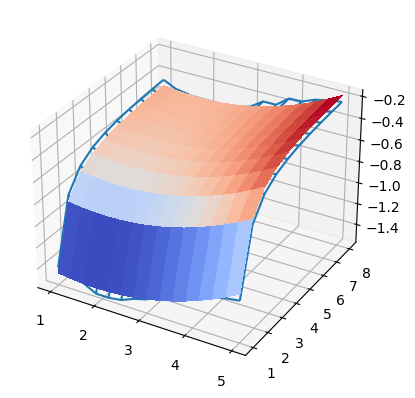

In [547]:
ys_estimated = []

for y_i in y:
    coefs = cool_regression(x1, y_i, 3)
    ys_estimated.append(coefs[2] * x1 ** 2 + coefs[1] * x1 + coefs[0])

ys_estimated = np.array(ys_estimated)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, y)
ax.plot_surface(X1, X2, ys_estimated, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

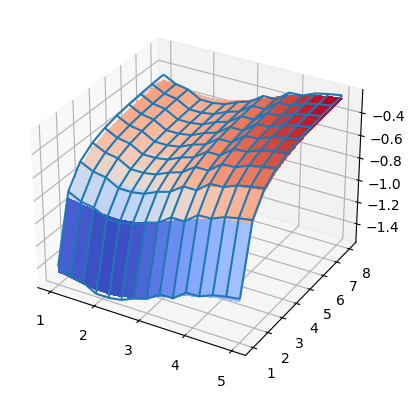

In [548]:
ys_estimated_nadaraya = []

for y_i in y:
    ys_estimated_nadaraya.append(nadaraya_watson(x1, y_i))

ys_estimated_nadaraya = np.array(ys_estimated_nadaraya)
ax = plt.axes(projection='3d')
# ax.view_init(45, 0)
ax.plot_wireframe(X1, X2, y)
ax.plot_surface(X1, X2, ys_estimated_nadaraya, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

In [549]:
def stability(arr, eps=1e-5):
    for el in arr:
        if el > eps:
            return True
    return False

In [550]:
def kernel_gamma(z):
    if abs(z) <= 1:
        return (1 - z ** 2) ** 2
    else:
        return 0

In [551]:
def lowess(x, y, h=0.5):
    n = len(x)

    gamma = np.ones(n)
    gamma_old = np.zeros(n)
    yest = np.zeros(n)
    cnt = 0

    while stability(np.abs(gamma - gamma_old)):
        cnt += 1
        w = []
        for t in range(n):
            w.append([])
            for i in range(n):
                w[t].append(kernel(distance.euclidean([x[t]], [x[i]]) / h) * gamma[t])
        w = np.array(w)
        yest = (w * y[:, None]).sum(axis=0) / w.sum(axis=0)

        err = np.abs(yest - y)
        gamma = [kernel_gamma(err[j]) for j in range(n)]
        if (cnt > 5):
            break
    return yest

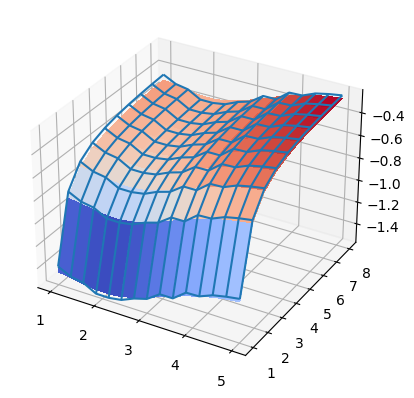

In [552]:
ys_estimated_lowess = []

for y_i in y:
    ys_estimated_lowess.append(lowess(x1, y_i))

ys_estimated_lowess = np.array(ys_estimated_lowess)
ax = plt.axes(projection='3d')
# ax.view_init(45, 0)
ax.plot_wireframe(X1, X2, y)
ax.plot_surface(X1, X2, ys_estimated_lowess, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

In [553]:
def mse(x_real, x_estimate):
    n = len(x_real)
    return np.sqrt(np.sum(np.power(x_real - x_estimate, 2))) / n


def weird_e(x_real, x_estimate):
    n = len(x_real)
    return np.sum(np.abs(x_real - x_estimate)) / (n * (np.max(x_real) - np.min(x_real)))


mse(y, ys_estimated_nadaraya)

0.030865955435425713

In [554]:
mse(y_real, ys_estimated_lowess)

0.03764273406183138

In [555]:
weird_e(y_real, ys_estimated_nadaraya)

0.2724796147090757

In [556]:
weird_e(y_real, ys_estimated_lowess)

0.27264818273955654

In [557]:
mse(y_real, ys_estimated)

0.04666061976996798

In [558]:
weird_e(y_real, ys_estimated)

0.35298738788469913

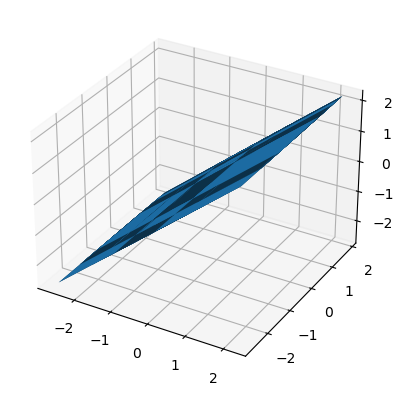

In [16]:
sas1, sas2 = np.meshgrid(np.random.normal(size=50), np.random.normal(size=50))
axes = plt.axes(projection='3d')
axes.plot_surface(sas1, sas2, sas1)